In [71]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf

pd.options.display.max_columns = None

In [72]:
df = pd.read_csv('Clean Datasets/All-Clean-Game-Logs.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Date,Time,Season,Type,Opponent,Rank,Ranked Match,Conf,Rest Days,SRS,Result,Points For,Points Against,W,L,Home Game,Win Streak,Lose Streak,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,OPP FG,OPP FGA,OPP FG%,OPP 3P,OPP 3PA,OPP 3P%,OPP FT,OPP FTA,OPP FT%,OPP ORB,OPP TRB,OPP AST,OPP STL,OPP BLK,OPP TOV,OPP PF,FG_rolling_5,FGA_rolling_5,FG%_rolling_5,3P_rolling_5,3PA_rolling_5,3P%_rolling_5,FT_rolling_5,FTA_rolling_5,FT%_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP FG_rolling_5,OPP FGA_rolling_5,OPP FG%_rolling_5,OPP 3P_rolling_5,OPP 3PA_rolling_5,OPP 3P%_rolling_5,OPP FT_rolling_5,OPP FTA_rolling_5,OPP FT%_rolling_5,OPP ORB_rolling_5,OPP TRB_rolling_5,OPP AST_rolling_5,OPP STL_rolling_5,OPP BLK_rolling_5,OPP TOV_rolling_5,OPP PF_rolling_5
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,W,78,70,1,0,True,1,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,W,83,71,2,0,False,2,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,L,69,90,2,1,False,0,1,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,W,66,53,3,1,True,1,0,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,W,85,57,4,1,True,2,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40


In [73]:
# Rename columns with spaces for better usability

df = df.rename(columns={
    "Home Game": "Home_Game",
    "Points For": "Points_For",
    "Points Against": "Points_Against",
    "Rest Days": "Rest_Days",
    "Ranked Match": "Ranked_Match",
    "Win Streak": "Win_Streak",
    "Lose Streak": "Lose_Streak",
    "FG%": "FG_Percent",
    "3P%": "3P_Percent",
    "FT%": "FT_Percent",
    "OPP FG": "OPP_FG",
    "OPP FGA": "OPP_FGA",
    "OPP FG%": "OPP_FG_Percent",
    "OPP 3P": "OPP_3P",
    "OPP 3PA": "OPP_3PA",
    "OPP 3P%": "OPP_3P_Percent",
    "OPP FT": "OPP_FT",
    "OPP FTA": "OPP_FTA",
    "OPP FT%": "OPP_FT_Percent",
    "OPP ORB": "OPP_ORB",
    "OPP TRB": "OPP_TRB",
    'OPP AST': 'OPP_AST',
    'OPP STL': 'OPP_STL',
    'OPP BLK': 'OPP_BLK',
    'OPP TOV': 'OPP_TOV',
    'OPP PF': 'OPP_PF',
    'FG_rolling_5': 'FG_rolling_5',
    'FGA_rolling_5': 'FGA_rolling_5',
    'FG%_rolling_5': 'FG_Percent_rolling_5',
    '3P_rolling_5': '3P_rolling_5',
    '3PA_rolling_5': '3PA_rolling_5',
    '3P%_rolling_5': '3P_Percent_rolling_5',
    'FT_rolling_5': 'FT_rolling_5',
    'FTA_rolling_5': 'FTA_rolling_5',
    'FT%_rolling_5': 'FT_Percent_rolling_5',
    'ORB_rolling_5': 'ORB_rolling_5',
    'TRB_rolling_5': 'TRB_rolling_5',
    'AST_rolling_5': 'AST_rolling_5',
    'STL_rolling_5': 'STL_rolling_5',
    'BLK_rolling_5': 'BLK_rolling_5',
    'TOV_rolling_5': 'TOV_rolling_5',
    'PF_rolling_5': 'PF_rolling_5',
    'OPP FG_rolling_5': 'OPP_FG_rolling_5',
    'OPP FGA_rolling_5': 'OPP_FGA_rolling_5',
    'OPP FG%_rolling_5': 'OPP_FG_Percent_rolling_5',
    'OPP 3P_rolling_5': 'OPP_3P_rolling_5',
    'OPP 3PA_rolling_5': 'OPP_3PA_rolling_5',
    'OPP 3P%_rolling_5': 'OPP_3P_Percent_rolling_5',
    'OPP FT_rolling_5': 'OPP_FT_rolling_5',
    'OPP FTA_rolling_5': 'OPP_FTA_rolling_5',
    'OPP FT%_rolling_5': 'OPP_FT_Percent_rolling_5',
    'OPP ORB_rolling_5': 'OPP_ORB_rolling_5',
    'OPP TRB_rolling_5': 'OPP_TRB_rolling_5',
    'OPP AST_rolling_5': 'OPP_AST_rolling_5',
    'OPP STL_rolling_5': 'OPP_STL_rolling_5',
    'OPP BLK_rolling_5': 'OPP_BLK_rolling_5',
    'OPP TOV_rolling_5': 'OPP_TOV_rolling_5',
    'OPP PF_rolling_5': 'OPP_PF_rolling_5'
})

In [74]:
# Turn our response variable to categorical

df['Result'] = 1 * (df['Result'] == 'W')
df.head()

,Date,Time,Season,Type,Opponent,Rank,Ranked_Match,Conf,Rest_Days,SRS,Result,Points_For,Points_Against,W,L,Home_Game,Win_Streak,Lose_Streak,FG,FGA,FG_Percent,3P,3PA,3P_Percent,FT,FTA,FT_Percent,ORB,TRB,AST,STL,BLK,TOV,PF,OPP_FG,OPP_FGA,OPP_FG_Percent,OPP_3P,OPP_3PA,OPP_3P_Percent,OPP_FT,OPP_FTA,OPP_FT_Percent,OPP_ORB,OPP_TRB,OPP_AST,OPP_STL,OPP_BLK,OPP_TOV,OPP_PF,FG_rolling_5,FGA_rolling_5,FG_Percent_rolling_5,3P_rolling_5,3PA_rolling_5,3P_Percent_rolling_5,FT_rolling_5,FTA_rolling_5,FT_Percent_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP_FG_rolling_5,OPP_FGA_rolling_5,OPP_FG_Percent_rolling_5,OPP_3P_rolling_5,OPP_3PA_rolling_5,OPP_3P_Percent_rolling_5,OPP_FT_rolling_5,OPP_FTA_rolling_5,OPP_FT_Percent_rolling_5,OPP_ORB_rolling_5,OPP_TRB_rolling_5,OPP_AST_rolling_5,OPP_STL_rolling_5,OPP_BLK_rolling_5,OPP_TOV_rolling_5,OPP_PF_rolling_5
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,1,78,70,1,0,True,1,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,1,83,71,2,0,False,2,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,0,69,90,2,1,False,0,1,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,1,66,53,3,1,True,1,0,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,1,85,57,4,1,True,2,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40


In [75]:
# Filter to create the training dataset (first 4 seasons)
df_train = df[df['Season'].isin(['2019-2020', '2020-2021', '2021-2022', '2022-2023'])]

# Filter to create the test dataset (most recent season)
df_test = df[df['Season'] == '2023-2024']

# Confirm split
print("Training Set:", df_train['Season'].unique())
print("Test Set:", df_test['Season'].unique())

Training Set: ['2019-2020' '2020-2021' '2021-2022' '2022-2023']
Test Set: ['2023-2024']


In [76]:
# Create a basic model predicting Result from the 5 highest correlated variables
model_1 = smf.logit('Result ~ Lose_Streak + Win_Streak + Points_Against + OPP_FG_Percent + FG_Percent', data=df_train).fit()
print(model_1.summary())

         Current function value: 0.000110
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  128
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                            5
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.9998
Time:                        23:48:14   Log-Likelihood:              -0.014117
converged:                      False   LL-Null:                       -79.499
Covariance Type:            nonrobust   LLR p-value:                 1.641e-32
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.0696    346.669      0.087      0.931    -649.390     709.529
Lose_Streak      -23.5421    259.225     -0.091      

/Users/isaac/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/isaac/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/isaac/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/isaac/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

In [77]:
# Predict on training data
train_predictions_1 = model_1.predict(df_train[['Lose_Streak', 'Win_Streak', 'Points_Against', 'OPP_FG_Percent', 'FG_Percent']])
train_accuracy_1 = (train_predictions_1.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_1 = model_1.predict(df_test[['Lose_Streak', 'Win_Streak', 'Points_Against', 'OPP_FG_Percent', 'FG_Percent']])
test_accuracy_1 = (test_predictions_1.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_1)
print("Test Accuracy:", test_accuracy_1)

Training Accuracy: 1.0
Test Accuracy: 1.0


In [78]:
# Suspect that some variables were leading our model to predict the result too easily, so we'll create another with more realistic variables
model_2 = smf.logit('Result ~ FG_Percent + OPP_FG_Percent + OPP_FT + FT + Ranked_Match + Home_Game', data=df_train).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.170819
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  128
Model:                          Logit   Df Residuals:                      121
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.7250
Time:                        23:48:14   Log-Likelihood:                -21.865
converged:                       True   LL-Null:                       -79.499
Covariance Type:            nonrobust   LLR p-value:                 1.604e-22
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3135      3.809     -0.345      0.730      -8.780       6.153

In [79]:
# Predict on training data
train_predictions_2 = model_2.predict(df_train[['OPP_FG_Percent', 'FG_Percent', 'OPP_FT', 'FT', 'Ranked_Match', 'Home_Game']])
train_accuracy_2 = (train_predictions_2.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_2 = model_2.predict(df_test[['OPP_FG_Percent', 'FG_Percent', 'OPP_FT', 'FT', 'Ranked_Match', 'Home_Game']])
test_accuracy_2 = (test_predictions_2.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_2)
print("Test Accuracy:", test_accuracy_2)

Training Accuracy: 0.921875
Test Accuracy: 0.8157894736842105


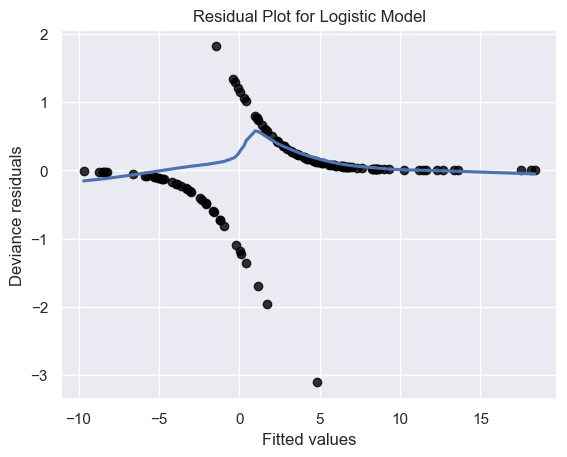

In [80]:
# Plotting residuals for diagnostics
sns.regplot(x=model_2.fittedvalues, y=model_2.resid_dev, color='black', line_kws={'color':'b'}, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Deviance residuals')
plt.title('Residual Plot for Logistic Model')
plt.show()

In [81]:
# Now create a model that would be more realistic with what kind of data we would have before a match
model_3 = smf.logit('Result ~ SRS + Rank + Ranked_Match + Home_Game + FG_Percent_rolling_5 + OPP_FG_Percent_rolling_5', data=df_train).fit()
print(model_3.summary())

Optimization terminated successfully.
         Current function value: 0.622802
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                   39
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            5
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.1011
Time:                        23:48:15   Log-Likelihood:                -24.289
converged:                       True   LL-Null:                       -27.020
Covariance Type:            nonrobust   LLR p-value:                    0.3622
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.2454   3.06e+14  -7.33e-15      1.000      -6e+14

In [83]:
# Predict on training data
train_predictions_3 = model_3.predict(df_train[['SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
train_accuracy_3 = (train_predictions_3.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_3 = model_3.predict(df_test[['SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
test_accuracy_3 = (test_predictions_3.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_3)
print("Test Accuracy:", test_accuracy_3)

Training Accuracy: 0.1796875
Test Accuracy: 0.10526315789473684


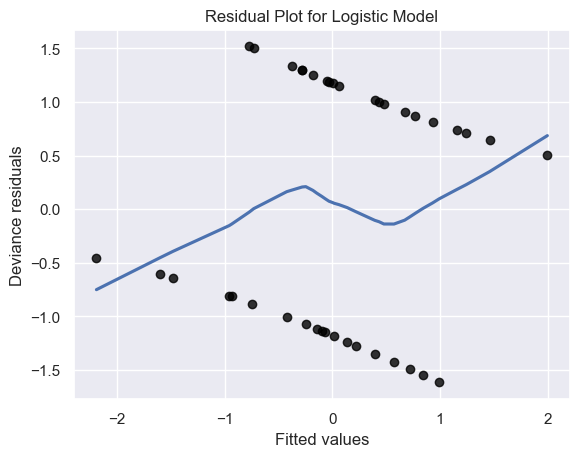

In [84]:
# Plotting residuals for diagnostics
sns.regplot(x=model_3.fittedvalues, y=model_3.resid_dev, color='black', line_kws={'color':'b'}, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Deviance residuals')
plt.title('Residual Plot for Logistic Model')
plt.show()